**Engy-5050** Reactor Physics, UMass Lowell, Chem. Eng. Nuclear Program Spring 2022; Prof. V. F. de Almeida

# 1-D Point Source Neutron Transport
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

**Student(s):** Anthony Bowers, Andrew Hamel <br>
**Course:** Engy-5050 Reactor Physics  <br>


UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**7March2022**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [FEM Approach](#app)
 + [Analytical Solution](#analyticalsol)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
    - [One-Group Energy](#onegroupenergy)
    - [Two-Group Energy](#twogroupenergy)
* [FDM Approach](#appFDM)
 + [Discretization](#setupFDM)
    - [One-Group Energy](#onegroupenergyFDM)
    - [Two-Group Energy](#twogroupenergyFDM)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

## [Problem Statement](#toc)<a id="problem"></a>

This investigation looks to determine how Finite Element Method (FEM) computation of the neutron diffusion equation compare to that of the Finite Difference Method (FDM) computation given standard assumptions about the definition of the diffusion coefficient in homogenous mediums far from and close to voids. Defining diffusion coefficients for neutron transport is an active field of research and includes approximations such as isotropic scattering, linear in angle, nonlocal weighting of nearby average transport properties, Monte Carlo study and experiment.

Here we will compare the analytic linear transport result for non-absorbing and moderately absorbing mediums given a point source in spherical geometry. As well as, comaprison of the two computational methods of FEM and FDM. 

For a monoenergetic group time independent neutron diffusion equation (NDE) in written assuming azimuthal symmetry as

Compute $\Phi_g:[r_\text{i},r_\text{o}]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
  \nabla \cdot D_g \nabla \Phi_g(r) - \Sigma_{g,r} \Phi_g(r) + S_{g'\rightarrow g} &= 0 \\
   q_{n,g}(r_\text{i}) &= A_g, \\
   q_{n,g}(r_\text{o}) &= \frac{\alpha}{2}\Phi_g(r_\text{o}).
\end{align*}

where the source term $S_{g'\rightarrow g} := \sum_{g'=1}^{G} \int_\Omega \Sigma_{s,g'\rightarrow g}\, f_{s,g'\rightarrow g}(\mu)\,d\Omega$ is the group down-scattering contribution for each group $g$.

The neutron scalar flux is: $\Phi(r)\ [n/cm^2 s]$ 

The total macroscopic cross section is: $\Sigma_{tot} = \Sigma_{non-el} + \Sigma_{el} \approx \Sigma_{abs} + \Sigma_{el}$

And the removal cross section for the multi group cross section is $ \Sigma_{r} = \Sigma_{tot} - \bar{\mu}\Sigma_{s} $

For brevity, $S' = Q^{fis}_{ext} + Q^{sc}_{in}$, is written as the combined source for exterior sources and fission sources or scatter in from out of group (up and down scatter). The full _scatter in term_ requires a _group averaged scatter cross section_ that further requires a _transfer function_ differential in post collision direction $\Omega \cdot \Omega '$. 

Here for the free surface (vacuum) boundary condition. The neutron density at the outer boundary $\Phi(r) = |v| n(r) = 0$ if $ n_b\cdot \Omega < 0 $.

### Domain
The domain utilized in the simulation is spherical geometry containt a point source. Surronding the point source is light-water.

### [Analytic Solution](#toc)<a id="analyticalsol"></a> 

A general solution is commonly given without the asymptotic condition as:

\begin{align*}
    \Phi(r) =  \frac{S_0 e^{-\kappa r}}{4\pi Dr} \ \ \ (2)
\end{align*}



## [FEM Approach](#toc)<a id="app"></a>

### [Strong Form of Problem Statement BARE REACTOR](#toc)<a id="dbcstrong"></a>

 Find $\Phi_1:[a,b]\subset \mathbb{R} \rightarrow\mathbb{R}$ and $\Phi_2:[a,b]\subset\mathbb{R}\rightarrow\mathbb{R}$ for $D_1 > 0$ and $D_2 > 0$ such that:

\begin{align*}
 0= -div_{x}(-D_1\, \nabla_{x}\Phi_1)- \Sigma_{1,a} \Phi_1(x)+ S(\Phi_1, \Phi_2) + \chi(E_{1}) \frac{v}{k}\Sigma_{1,f}\Phi_1(x)  \quad \forall \quad x\in [a,b], \\
-D_1 \nabla \Phi_1(a) &= 0, \\
 -D_1 \nabla \Phi_1(b) &= ( \frac{1}{2} \Phi_1).
\end{align*}

and

\begin{align*}
  0= -div_{x}(-D_2\,\nabla_{x}\Phi_2) -\Sigma_{2,a} \Phi_2(x) - S(\Phi_1, \Phi_2) + \chi(E_{2}) \frac{v}{k}\Sigma_{2,f}\Phi_2(x)  \quad \forall \quad x\in [a,b], \\
 -D_2 \nabla \Phi_2(a) &= 0, \\
 -D_2 \nabla \Phi_2(b) &= ( \frac{1}{2} \Phi_2).
\end{align*}

The *diffusion flux* associated to the quantity $\Phi_i, \, \ i=1,2$ is denoted $q_i := -D_i\,\Phi_i'$, and it is often of interest as a derived quantity of the neutron spatial transport theory. 

### [Source Coupling](#toc)<a id="sourcecoupling"></a>

Consider the following source coupling:

\begin{align*}
 S(\Phi_1, \Phi_2) = S_1 - h_1\,\bigl(\Phi_1-\Phi_1^*\bigr) - \Bigl( S_2 - h_2\, \bigl(\Phi_2 - \Phi_2^*\bigr) \Bigr)
\end{align*}

where $S_i$ is a fixed source (sink) for each Neutron group, $h_i$ is a transfer coefficient, and $\Phi_i^*$ is a saturation value.

Moreover, for this particular problem:

\begin{align*}
 S_1=0 \\
 S_2=0 \\
 \Phi_2=0 \\
 \Phi_1^*=0 \\
 \Phi_2^*=0 \\
 h_1=\Sigma_{s,1 \rightarrow 2} \\
 h_2=0
\end{align*}

Enstating these values reduces the source coupling to 
\begin{align*}
 S(\Phi_1, \Phi_2) = -\Sigma_{s,1 \rightarrow 2} \Phi_1 
\end{align*}

Where the conceptual reads this means that group one neutrons looses neutrons due to the downscattering into group two. Conversely this means group two has a source term. Moreover, if upscattering was to be taken into account $h_2 = \Sigma_{s,2 \rightarrow 1}$ and $\Phi_2$ would exist for a combined source term of, 

\begin{align*}
 S(\Phi_1, \Phi_2) = -\Sigma_{s,1 \rightarrow 2} \Phi_1 + \Sigma_{s,2 \rightarrow 1} \Phi_2
\end{align*}

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 

The Galerkin weak formulation of the strong form is as follows. Find $\Phi_1 \in H^1\!\bigl([a,b]\bigr)$ and $\Phi_2 \in H^1\!\bigl([a,b]\bigr)$
so that 

\begin{align*}
 \int\limits_a^b \Sigma_{1,a}  \Phi_1(x)\, w(x)\,dx + \int\limits_a^b D\, \Phi_1'(x)\,w'(x)\,dx - \int\limits_a^b S(\Phi_1, \Phi_2)\,w(x)\,dx &= 0 \quad \forall \quad w \in H^1_0\!\bigl([a,b]\bigr), \text{and}
 \\
  \int\limits_a^b \Sigma_{2,a}  \Phi_2(x)\, w(x)\,dx + \int\limits_a^b D\, \Phi_2'(x)\,w'(x)\,dx + \int\limits_a^b S(\Phi_1, \Phi_2)\,w(x)\,dx &= 0 \quad \forall \quad w \in H^1_0\!\bigl([a,b]\bigr),
\end{align*}

where $H^1\!\bigl([a,b]\bigr) := \bigl\{ \Phi:[a,b]\subset\mathbb{R}\rightarrow\mathbb{R} \mid \int_a^b \Phi'^2\,dx < \infty\bigr\}$ and $H^1_0\!\bigl([a,b]\bigr) := \bigl\{ w \mid w \in H^1(a,b), w(a) = 0, w(b) =0 \bigr\}$. Both function sets as just defined are Hilbert spaces. The function $w$ is called a test function. Because $w$, $\Phi_1$, $\Phi_2$ are sought in very similar sets of functions, this weak form is called Galerkin's weak form.

The new form of the source term is the key term to be computed here. Since the MOOSE framework performs the integration, and provides the implementation of the test function, we need to provide the integrand of the integral, that is, the kernel. Therefore the kernel needed is an expansion of what has been covered so far in the course:

 1. $\pm S(\Phi_1, \Phi_2)\,w(x)$.
 
The kernels are to be evaluated at quadrature points provided by the MOOSE framework.
1. Multiply NDE by a test function $\phi$.
2. Integrate over spatial and angular domain.
3. Use divergence theorem to set the boundary condition across the domain surface.

The weak form becomes:

\begin{align*}
    ( \nabla \phi, D_1 \nabla \Phi_1  )\ - < \phi, D_1 \nabla \Phi_1 \cdot \bar{n_b} > +\ (\phi , \Sigma_{a,1} \Phi_1) = (\phi,S(\Phi_1, \Phi_2)) \ \ \ (G1)\\
      ( \nabla \phi, D_2 \nabla \Phi_2  )\ - < \phi, D_2 \nabla \Phi_2 \cdot \bar{n_b} > +\ (\phi , \Sigma_{a,2} \Phi_2) = - (\phi,S(\Phi_1, \Phi_2)) \ \ \ (G2)
\end{align*}

This weak form contains the volume and surface integral as written with parenthesis and brackets respectively. 

Then boundary conition at the center, $a$, is implemented and descritized as such: 
\begin{align*}
\\
 4\pi r^{2} \lim_{r\rightarrow 0}(-D_1\Phi_1'(a)) &= S_0 \\
  -D_2 \nabla \Phi_2'(a) &= 0 \\\\
\end{align*}

Then the boundary conditions for the partial currents at the surface, $b$, given as $\Gamma^{\pm}$ must be solved for:

\begin{align*}
    \Gamma^{+} = J^{out}({R_S}) = \nabla \Phi \cdot \bar{n_b}
\end{align*}

\begin{align*}
    \Gamma^{-} = J^{in}({R_S}) = 0
\end{align*}

Here we will use the Robin Vacuum boundary condition, at position $b$, such that the reflectivity at the boundary is 0 as:

\begin{align*}
    \frac{1}{4} \Phi + \frac{1}{2} D \nabla \Phi \cdot \bar{n_b} = J^{-} = \frac{\Phi}{4} - \frac{J}{2} = \frac{\Phi}{4} - \frac{D \nabla \Phi}{2}
\end{align*}

Solving for the weak form boundary condition and multiplying our test function $\phi$:

\begin{align*}
     \phi (D_1 \nabla \Phi_1(b) \cdot \bar{n_b}) = \phi( \frac{1}{2} D_1 \nabla \Phi_1) \\
     \phi (D_2 \nabla \Phi_2(b) \cdot \bar{n_b}) = \phi( \frac{1}{2} D_2 \nabla \Phi_2)
\end{align*}

#### 2 Group NDE  Weak Form:

Assuming no upscattering from group 2 to group 1:

\begin{align*}
    -\nabla \cdot D_1 \nabla \Phi_1(r)  + \Sigma_{a,1} \Phi_1(r) =  -\Sigma_{s,1 \rightarrow 2} \Phi_1(r) \ \ \ 
\end{align*}

\begin{align*}
    -\nabla \cdot D_2 \nabla \Phi_2(r)  + \Sigma_{a,2} \Phi_2(r) =  \Sigma_{s,1 \rightarrow 2} \Phi_1(r) \ \ \  
\end{align*}


This report will examine bare and reflected spherical core geometries for the case of a plutonium core and a beryllium reflector. This configuration is somewhat similar to the "demon core", a weapon core which was the cause of two criticality accidents at Los Alamos in the mid 1940's. While the core itself was subcritical, it briefly became supercritical when it was encased in two hemispheres of reflective beryllium. A model of the neutron flux in the fuel and reflector for a spherical reactor has been developed using a two group approximation. This approximation assumes an energy cutoff of 1 eV between the slow and fast neutron energy bins. Some key assumptions are made, firstly that no slow neutrons upscatter into the fast energy bin. Continuity of flux and neutron density is assumed at the interface between the fuel and reflective regions. A Neumann boundary condition of zero flux is assumed at the center of the sphere, and a vacuum condition is assumed at the outer edge of the reflector. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [1]:
# Parameters of fissioning u-235
#Mircoscopic cross section for transport, fission, and absorption
eta_tr=[4.5e-24, 7.2e-24]
eta_f=[1.29e-24, 1.44e-24]
eta_a=[.08e-24, .28e-24]
eta_12=1.5*10e-24

#Parameters for atomic density
Na=6.022*10e23
molar_mass=235
mass_of_fuel=2 # 2 grams of fuel
N_density= Na*mass_of_fuel/molar_mass

#Macroscopic cross section for transport, fission, and absorption
sigma_tr=[N_density*eta_tr[0], N_density*eta_tr[1]] 
sigma_f=[N_density*eta_f[0], N_density*eta_f[1]]
sigma_a=[N_density*eta_a[0], N_density*eta_a[1]]
#Macroscopic cross section for group-1 downscattering into group-2
sigma_12=N_density*eta_12

#Fission emission
v=[2.7 ,2.5]

#Fission Spectrum
chi=[.575, .425]

#Diffusion Coefficent
D1=1/(3*sigma_tr[0])
D2=1/(3*sigma_tr[1])

print('Diffusion Coefficent for group-1 [cm] = ',D1)
print('Diffusion Coefficent for group-2 [cm]=',D2)
print('Downscattering Macroscopic cross section [cm^-1]=',sigma_12)
print('Macroscopic cross section for Fission (group-1) [cm^-1]=',sigma_f [0])
print('Macroscopic cross section for Fission (group-2) [cm^-1]=',sigma_f [1])

print('Macroscopic cross section for Absorption (group-1) [cm^-1]=',sigma_a[0])
print('Macroscopic cross section for Absorption (group-2) [cm^-1]=',sigma_a[1])

Diffusion Coefficent for group-1 [cm] =  1.4453177854041355
Diffusion Coefficent for group-2 [cm]= 0.9033236158775847
Downscattering Macroscopic cross section [cm^-1]= 0.7687659574468086
Macroscopic cross section for Fission (group-1) [cm^-1]= 0.06611387234042554
Macroscopic cross section for Fission (group-2) [cm^-1]= 0.07380153191489362
Macroscopic cross section for Absorption (group-1) [cm^-1]= 0.0041000851063829795
Macroscopic cross section for Absorption (group-2) [cm^-1]= 0.014350297872340427


#### [One-Group Energy](#toc)<a id="onegroupenergy"></a>

In [ ]:
!cat inputEigenProblem.hit

In [ ]:
!rm inputEigenProblem_out_eigenvalue-data_0001*.csv
!./neutron__transport-opt -i inputEigenProblem.hit

In [6]:
#!rm output1G*.csv
!./neutron__transport-opt -i input_test.hit


'.' is not recognized as an internal or external command,
operable program or batch file.


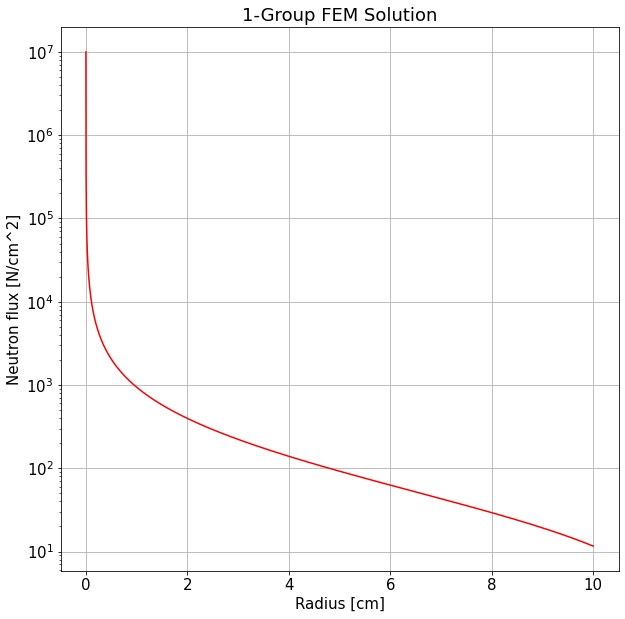

In [49]:
import pandas as pd
df = pd.read_csv('output1G_x-data_0002.csv')
#plot_solution(df, title='Dirichlet BC FEM Solution', basis_functions_type='Linear Lagrange', flux_basis_functions_type='Constant Monomial')
#print(df)
fig = plt.figure(figsize=(10,10))
plt.plot(df["x"],df["u1"],"r-")
plt.yscale("log")
#plt.xlim(0,100)
plt.xlabel("Radius [cm]")
plt.ylabel("Neutron flux [N/cm^2]")
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.title("1-Group FEM Solution")
plt.grid()
plt.show()

#### [Two-Group Energy](#toc)<a id="twogroupenergy"></a>

In [7]:
#!rm output2G*.csv
!./neutron__transport-opt -i input2G.hit

'.' is not recognized as an internal or external command,
operable program or batch file.


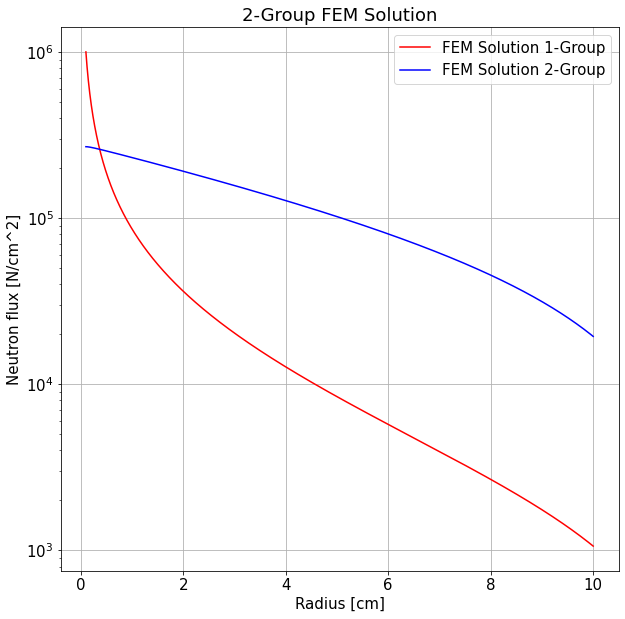

In [48]:
import pandas as pd
df = pd.read_csv('output2G_x-data_0002.csv')
fig = plt.figure(figsize=(10,10))
plt.plot(df["x"],df["u1"],"r-",label="FEM Solution 1-Group")
plt.plot(df["x"],df["u2"],"b-",label="FEM Solution 2-Group")
plt.yscale("log")
#plt.xlim(0,100)
plt.grid()
plt.legend()
plt.xlabel("Radius [cm]")
plt.ylabel("Neutron flux [N/cm^2]")
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.title("2-Group FEM Solution")
plt.show()

## [FDM Approach](#toc)<a id="appFDM"></a>

### [Discretization](#toc)<a id="setupFDM"></a> 

Similary to the FEM descretiation we are implementing the idea that group-1 is the fast neutrons that scatter into group-2 the thermal neutrons. 



Taking our NDE's and expanding to spherical coordinates:

For Group-1
\begin{align*}
    -\nabla \cdot D_1 \nabla \Phi_1(r)  + \Sigma_{a,1} \Phi_1(r) =  -\Sigma_{s,1 \rightarrow 2} \Phi_1(r) \ \ \ 
\end{align*}

\begin{align*}
   -D_{fast} \left [ \frac{d\Phi(r)_{fast}^{2}}{d^{2}r}+\frac{2}{r}\frac{d\Phi(r)_{fast}}{dr} \right ] +\Sigma_{a,fast}\Phi(r)_{fast} + \Sigma_{s,fast \rightarrow thermal}\Phi(r)_{fast} = 0\ \ \ 
\end{align*}

Then Group-2
\begin{align*}
    -\nabla \cdot D_2 \nabla \Phi_2(r)  + \Sigma_{a,2} \Phi_2(r) =  \Sigma_{s,1 \rightarrow 2} \Phi_1(r) \ \ \  
\end{align*}

\begin{align*}
 -D_{thermal} \left [ \frac{d\Phi(r)_{thermal}^{2}}{d^{2}r}+\frac{2}{r}\frac{d\Phi(r)_{thermal}}{dr} \right ] +\Sigma_{a,thermal}\Phi(r)_{thermal} -  \Sigma_{s,fast \rightarrow thermal} \Phi(r)_{fast} =0 \ \ \  
\end{align*}

Re-organizing results in the fast neutron (1eV>) equation:
\begin{align*}
\frac{d\Phi(r)_{fast}^{2}}{d^{2}r}+\frac{2}{r}\frac{d\Phi(r)_{fast}}{dr}-\frac{\Sigma_{a,fast}}{D_{fast}}\Phi(r)_{fast}= \frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}\Phi(r)_{fast}
\end{align*}

Likewise for thermal neutrons (1eV<)
\begin{align*}
\frac{d\Phi(r)_{thermal}^{2}}{d^{2}r}+\frac{2}{r}\frac{d\Phi(r)_{thermal}}{dr}-\frac{\Sigma_{a,thermal}}{D_{thermal}}\Phi(r)_{thermal}= -\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{thermal}}\Phi(r)_{fast}
\end{align*}

As depicted from the equation above the coupling of the two groups is done by the source term. This conceptually makes sense *need to look over interaction cross section for thermalcase*


Now that the differentials are expanded into their respected spherical coordinates a Talyor series expansion using a central approximation for each each derivative can be implemented. 

Where for a second order derivative the central approximation: 
\begin{align*}
\frac{d\Phi(r)_{fast}^{2}}{d^{2}r}= \frac {\Phi(r)_{i+1,fast}-2\Phi(r)_{i,fast}+\Phi(r)_{i,fast}}{h^2}
\end{align*}

Then for the first order central approximation:
\begin{align*}
\frac{d\Phi(r)_{fast}}{dr}= \frac{2}{r_{i}}\frac {\Phi(r)_{i+1,fast}-\Phi(r)_{i-1,fast}}{2h}
\end{align*}

Next for the zeroth order central approximation for both absorption and downscattering, respectively:
\begin{align*}
-\frac{\Sigma_{a,fast}}{D}\Phi(r)_{fast}=-\frac{\Sigma_{a,fast}}{D_{fast}}\Phi(r)_{i,fast} \\
\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}\Phi(r)_{fast}=\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}\Phi(r)_{i,fast}
\end{align*}

Then combining all terms results in: 
\begin{align*}
\frac {\Phi(r)_{i+1,fast}-2\Phi(r)_{i,fast}+\Phi(r)_{i,fast}}{h^2}+\frac{2}{r_{i}}\frac {\Phi(r)_{i+1,fast}-\Phi(r)_{i-1,fast}}{2h}-\frac{\Sigma_{a,fast}}{D_{fast}}\Phi(r)_{i,fast}=\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}\Phi(r)_{i,fast}
\end{align*}

Now we simplify: 
\begin{align*}
 \Phi(r)_{i+1,fast}-2\Phi(r)_{i,fast}+\Phi(r)_{i,fast}+h\frac{\Phi(r)_{i+1,fast}-\Phi(r)_{i-1,fast}}{r_{i}}-h^2\frac{\Sigma_{a,fast}}{D_{fast}}\Phi(r)_{i,fast}=h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}\Phi(r)_{i,fast}
 \end{align*}
 
 Repeating the same process thermal: 
 \begin{align*}
 \Phi(r)_{i+1,thermal}-2\Phi(r)_{i,thermal}+\Phi(r)_{i,thermal}+h\frac{\Phi(r)_{i+1,thermal}-\Phi(r)_{i-1,thermal}}{r_{i}}-h^2\frac{\Sigma_{a,thermal}}{D_{thermal}}\Phi(r)_{i,thermal}=-h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{thermal}} \Phi(r)_{i,fast}
 \end{align*}
 


Now that we have both groups descritized as such:


\begin{align*}
 \Phi(r)_{i+1,fast}-2\Phi(r)_{i,fast}+\Phi(r)_{i,fast}+h\frac{\Phi(r)_{i+1,fast}-\Phi(r)_{i-1,fast}}{r_{i}}-h^2\frac{\Sigma_{a,fast}}{D_{fast}}\Phi(r)_{i,fast}=h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}\Phi(r)_{i,fast}
 \end{align*}
 
 \begin{align*}
 \Phi(r)_{i+1,thermal}-2\Phi(r)_{i,thermal}+\Phi(r)_{i,thermal}+h\frac{\Phi(r)_{i+1,thermal}-\Phi(r)_{i-1,thermal}}{r_{i}}-h^2\frac{\Sigma_{s,thermal}}{D_{thermal}}\Phi(r)_{i,thermal}=-\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{thermal}} \Phi(r)_{i,fast}
 \end{align*}
 
 We must now describe the domain and boundary conditions. First we describe some domain $\Omega [a,b] $ that has a step size equal to the difference in the boundaries length divided by the number of node , $N$: 
 
 \begin{gather*}
 h=\frac{b-a}{N}
\end{gather*}
  
  Then as for the boundary condition of the $first \ group$, fast neutrons, a Dirichlet and RobinVacuum boundary condition apply. 
 \begin{gather*}
 \Phi(r\rightarrow a)_{fast}=S_{0} \\
 \frac{d\Phi(r=b)_{fast}}{dr}=\frac{\Phi_{fast}}{2}
 \end{gather*}
 
These boundary conditions must be descritized similarly to the the differential but at that specific location in the domain. Where in terms of the matrix b is located at the Nth node of the matrix so b is located at $i = N  $ and vice versa for a located in $ i=0 $.   
 
\begin{gather*}
\Phi_{i=0,fast}=S_{0}  \\
\frac{\Phi(r)_{N+1,fast}-\Phi(r)_{N-1}}{2h}=\frac{\Phi_{N,fast}}{2}
\end{gather*}

These are the closure relations for first matrix cell i=1 and last matrix cell i=N. Now we set up the first cell of the matrix by enstating i=1  in the differential. 
\begin{gather*}
\Phi(r)_{2,fast}-2\Phi(r)_{1,fast}+\Phi(r)_{0,fast}+h\frac{\Phi(r)_{2,fast}-\Phi(r)_{0,fast}}{r_{i}}-h^2\frac{\Sigma_{a,fast}}{D_{fast}}\Phi(r)_{1,fast}=h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}\Phi(r)_{1,fast}
\end{gather*}

Now we can develope a matrix based of the ith number of $\Phi$. We may also recall the boundary condition for substitution of i=0
\begin{gather*}
\Phi_{0,fast}=S_{0}  \\
\Phi(r)_{2,fast}-2\Phi(r)_{1,fast}+\Phi(r)_{0,fast}+h\frac{\Phi(r)_{2,fast}-\Phi(r)_{0,fast}}{r_{i}}-h^2\frac{\Sigma_{a,fast}}{D_{fast}}\Phi(r)_{1,fast}=h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}\Phi(r)_{1,fast}
\end{gather*}

Then we repeat for the last matrix cell i=N. 
\begin{gather*}
\Phi(r)_{N+1,fast}-2\Phi(r)_{N,fast}+\Phi(r)_{N-1,fast}+h\frac{\Phi(r)_{N+1,fast}-\Phi(r)_{N-1,fast}}{r_{N}}-h^2\frac{\Sigma_{a,fast}}{D_{fast}}\Phi(r)_{N,fast}=h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}\Phi(r)_{N,fast}
\end{gather*}

Note that our uknown now is N+1,  this is typically refered to as a "ghost unknown" because it does not exist within our doman. However, we can eliminate this term but solving for it in the boundary conditions and substituting it in the equation.

\begin{gather*}
\frac{\Phi(r)_{N+1,fast}-\Phi(r)_{N-1}}{2h}=\frac{\Phi_{N,fast}}{2} \\
\Phi(r)_{N+1,fast}=h\Phi_{N,fast}+\Phi(r)_{N-1}
\end{gather*}

Lastly we consider all the inner nodes for i=2:N-1. The inner nodal terms are left as the ith term because a for loop is implemented. Therefore, it can be read as the (ith-1) group in the first column, (ith) group in the second column, and (ith+1) in the last column 

\begin{gather*}
 \Phi(r)_{i+1,fast}-2\Phi(r)_{i,fast}+\Phi(r)_{i,fast}+h\frac{\Phi(r)_{i+1,fast}-\Phi(r)_{i-1,fast}}{r_{i}}-h^2\frac{\Sigma_{a,fast}}{D_{fast}}\Phi(r)_{i,fast}=h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}\Phi(r)_{i,fast}
\end{gather*}

Thus we build the matrix.
\begin{gather*}
\begin{bmatrix} -2-h^2(\frac{\Sigma_{a,fast}}{D_{fast}}+\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}) & 1+\frac{h}{r_{1}} & 0 & \cdots & \cdots \\ 1-\frac{h}{r_{2}} & -2-h^2(\frac{\Sigma_{a,fast}}{D_{fast}}+\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}) & 1+\frac{h}{r_{2}} & 0 &\cdots \\ 0 & 1-\frac{h}{r_{i}} & -2-h^2(\frac{\Sigma_{a,fast}}{D_{fast}}+\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}) & 1+\frac{h}{r_{i}} &0 \\ 0 &0 & \ddots & \ddots &\ddots \\ 0 & 0 & 0& 2 &-h -2 -\frac{h^2}{r_{N}}-h^2(\frac{\Sigma_{a,fast}}{D_{fast}}+\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{fast}}) \end{bmatrix} 
\\
\begin{bmatrix} \Phi_{i=1} \\ \Phi_{i=2} \\ \Phi_{i=3:N-1 ; i++}  \\ \Phi_{i=N}  \end{bmatrix} \\ = \begin{bmatrix} -\Phi_{0}(1-\frac{h}{r_{0}}) \\0 \\ 0  \\ 0  \end{bmatrix}
\end{gather*}


This process is then repeated for the second group.

 \begin{align*}
 \Phi(r)_{i+1,thermal}-2\Phi(r)_{i,thermal}+\Phi(r)_{i,thermal}+h\frac{\Phi(r)_{i+1,thermal}-\Phi(r)_{i-1,thermal}}{r_{i}}-h^2\frac{\Sigma_{a,thermal}}{D_{thermal}}\Phi(r)_{i,thermal}=-h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{thermal}} \Phi(r)_{i,fast}
 \end{align*}
 
The descritized boundary conditions of Neumann and VacuumRobin are as followed:
 \begin{align*}
 r \rightarrow 0 ; \frac {\Phi(r)_{i+1,thermal}-\Phi(r)_{i-1,thermal}}{2h}=0 \\
 r \rightarrow b ; \frac {\Phi(r)_{N+1,thermal}-\Phi(r)_{N-1,thermal}}{2h}= \frac{\Phi(r)_{N,thermal}}{2}
 \end{align*}
Where to couple the first and second group, the solution of the first group is substituted in the term. This becomes the B(i) term of the matrix
 \begin{align*}
-h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{thermal}} \Phi(r)_{i,fast}
  \end{align*}
 
 For a final matrix of 
\begin{gather*}
\begin{bmatrix} -2-h^2\frac{\Sigma_{a,thermal}}{D_{thermal}} & 2 & 0 & \cdots & \cdots \\ 1-\frac{h}{r_{2}} & -2-h^2\frac{\Sigma_{a,thermal}}{D_{thermal}} & 1+\frac{h}{r_{2}} & 0 &\cdots \\ 0 & 1-\frac{h}{r_{i}} & -2-h^2\frac{\Sigma_{a,thermal}}{D_{thermal}} & 1+\frac{h}{r_{i}} &0 \\ 0 &0 & \ddots & \ddots &\ddots \\ 0 & 0 & 0& 2 &-h -2 -\frac{h^2}{r_{N}}-h^2\frac{\Sigma_{a,thermal}}{D_{thermal}} \end{bmatrix} 
\begin{bmatrix} \Phi_{i=1} \\ \Phi_{i=2} \\ \Phi_{i=3:N-1 ; i++}  \\ \Phi_{i=N}  \end{bmatrix} = \begin{bmatrix} -h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{thermal}}\Phi(r)_{1,fast}\\\ -h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{thermal}}\Phi(r)_{2,fast}\\ -h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{thermal}}\Phi(r)_{i; i>2 ,fast} \\ -h^2\frac{\Sigma_{s,fast \rightarrow thermal}}{D_{thermal}}\Phi(r)_{N,fast}  \end{bmatrix}
\end{gather*}

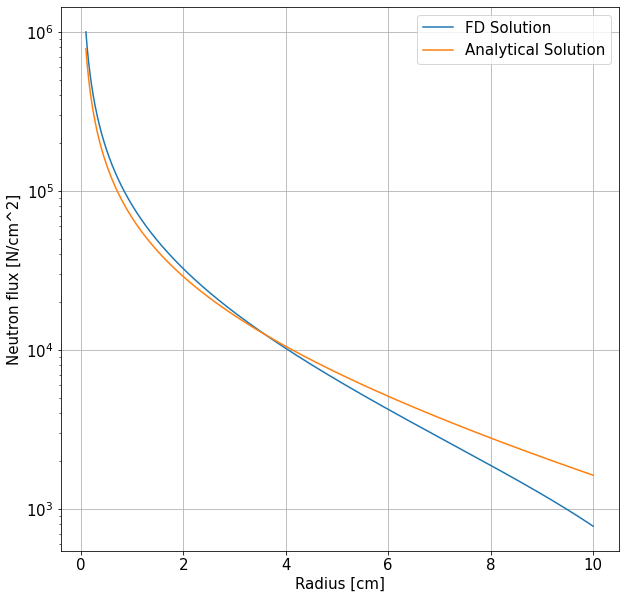

In [25]:
So = 1e6
N = 2000
rn = 10
r0 = 0.1
phi0 = So
alpha = 1

#need correct parameters
sigma_a_fast = 0.022
sigma_fast_thermal = 0.022
D_fast=0.87
##############################

h = (rn-r0)/(N+1)
r = np.arange(r0+h, rn, h)
R=rn
A = np.zeros((N,N))
B = np.zeros(N)
solution=np.zeros(4)

A[0,0] = -(sigma_a_fast/D_fast+sigma_fast_thermal/D_fast) * h**2 - 2
A[0,1] = 1 + (h/(r0))
B[0] = -phi0 * (1-h/r0)

for i in range(1,N-1):
    A[i,i-1] = (1-(h/r[i]))
    A[i,i] = -(sigma_a_fast/D_fast+sigma_fast_thermal/D_fast) * h**2 - 2
    A[i,i+1] = 1 + (h/r[i])
    B[i] = 0

A[-1,-1] = (-h - 2 - h**2 * 1/rn - (sigma_a_fast/D_fast+sigma_fast_thermal/D_fast) * h**2)
A[-1,-2] = 1 + 1+h/rn-h/rn
B[-1] = 0

L = np.sqrt(D_fast/sigma_a_fast)

group1 = np.linalg.solve(A , B)
group1 = np.concatenate((np.array([phi0]),group1,np.array([group1[-1]])))

r = np.concatenate((np.array([r0]),r,np.array([rn])))

## Analytical Solution 
it=0 
itmax = 30 
emax=1
tol = 1e-4
for i in range (1,4):
    phi=0;
    emax=1
    while emax>tol:
   
 
        phi_new=(So/(4*np.pi)+((So/(4*np.pi)*np.exp(-R/L)*(1-R/L)+phi*R/(2*D_fast))/(np.exp(R/L)*(1+R/L)-np.exp(-R/L)*(1-R/L))))*1/R*np.exp(-R/L)-((So/(4*np.pi)*np.exp(-R/L)*(1-R/L)+phi*R/(2*D_fast))/(np.exp(R/L)*(1+R/L)-np.exp(-R/L)*(1-R/L)))*1/R*np.exp(R/L)
        emax=np.max(np.abs(( phi_new-phi)/phi_new))
        phi=phi_new
 

    solution[i]=phi


r_a=np.linspace(.1,R,1000)
 
phi_analytical=(So/(4*np.pi)+((So/(4*np.pi)*np.exp(-R/L)*(1-R/L)+solution[1]*R/(2*D_fast))/(np.exp(R/L)*(1+R/L)-np.exp(-R/L)*(1-R/L))))*1/r_a*np.exp(-r_a/L)-((So/(4*np.pi)*np.exp(-R/L)*(1-R/L)+solution[1]*R/(2*D_fast))/(np.exp(R/L)*(1+R/L)-np.exp(-R/L)*(1-R/L)))*1/r_a*np.exp(r_a/L)


fig = plt.figure(figsize=(10,10))
plt.plot(r,group1,label="FD Solution")
plt.plot(r_a,phi_analytical,label="Analytical Solution")
plt.xlabel("Radius [cm]")
plt.ylabel("Neutron flux [N/cm^2]")
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.yscale("log")
plt.grid()
plt.legend()
plt.savefig("AnalyticalFDSolution.png",dpi=300)
plt.show()

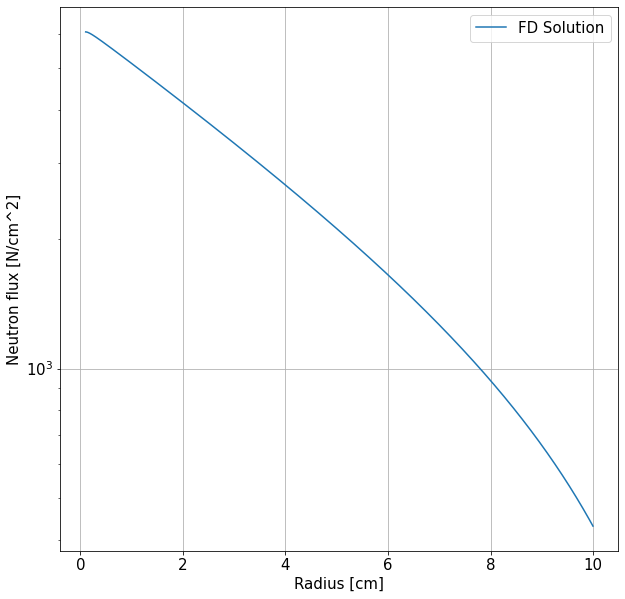

In [26]:
#Two group Finite Difference Method
So = 1e6
N = 2000
rn = 10
r0 = 0.1
phi0 = So
alpha = 1

#need correct parameters
sigma_a_fast = 0.022
sigma_fast_thermal = 0.022
sigma_a_thermal=0.022
D_fast=0.87
D_thermal=0.87
##############################


L1 = np.sqrt(D_fast/sigma_a_fast)
h = (rn-r0)/(N+1)
r = np.arange(r0+h, rn, h)

A = np.zeros((N,N))
B = np.zeros(N)

A[0,0] = -sigma_a_thermal/D_thermal * h**2 - 2
A[0,1] = 2
B[0] = -sigma_fast_thermal*h**2*group1[0]/D_thermal


for i in range(1,N-1):
    A[i,i-1] = (1-(h/r[i]))
    A[i,i] = -sigma_a_thermal/D_thermal * h**2 - 2
    A[i,i+1] = 1 + (h/r[i])
    B[i] = -sigma_fast_thermal*h**2*group1[i]/D_thermal


A[-1,-1] = (-h - 2 - h**2 * 1/rn - (sigma_a_thermal/D_thermal) * h**2 )
A[-1,-2] = 1 + 1+h/rn-h/rn
B[-1] = -sigma_fast_thermal*h**2*group1[-1]/D_thermal




group2 = np.linalg.solve(A , B)


x = np.linspace(0.1-h,10,N)
y = So/(4*np.pi * x * D_fast)*np.exp(-x/L1)

fig = plt.figure(figsize=(10,10))
plt.plot(r,group2,label="FD Solution")

plt.xlabel("Radius [cm]")
plt.ylabel("Neutron flux [N/cm^2]")
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.yscale("log")
plt.grid()
plt.legend()
plt.savefig("AnalyticalFDSolution.png",dpi=300)
plt.show()

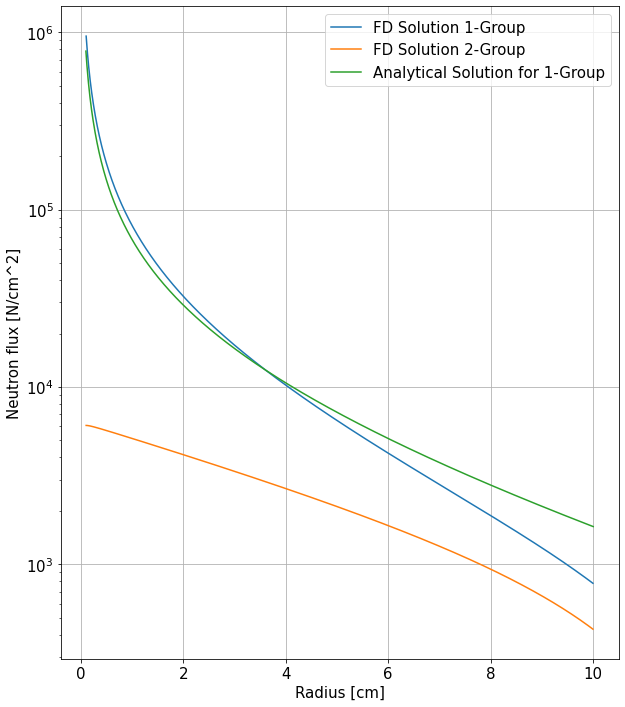

In [29]:
fig = plt.figure(figsize=(10,12))
#plt.plot(df["x"],df["u1"],"r-",label="FEM Solution 1-Group")
#plt.plot(df["x"],df["u2"],"b-",label="FEM Solution 2-Group")

plt.plot(r,group1[1:-1],label="FD Solution 1-Group")

#newely added
plt.plot(r,group2,label="FD Solution 2-Group")

plt.plot(r_a,phi_analytical,label="Analytical Solution for 1-Group")
plt.yscale("log")
#plt.xlim(0,100)
plt.grid()
plt.legend()
plt.xlabel("Radius [cm]")
plt.ylabel("Neutron flux [N/cm^2]")
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.savefig("Analytical_FD_FEM_Sols.png",dpi=300)
plt.show()

## [Results and Analysis](#toc)<a id="ranalysis"></a>